<a href="https://www.kaggle.com/code/vijays140291/indians-diabetest-database?scriptVersionId=153697625" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#trying to predict whether patient has diabetes or not



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
#showing the dataset
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


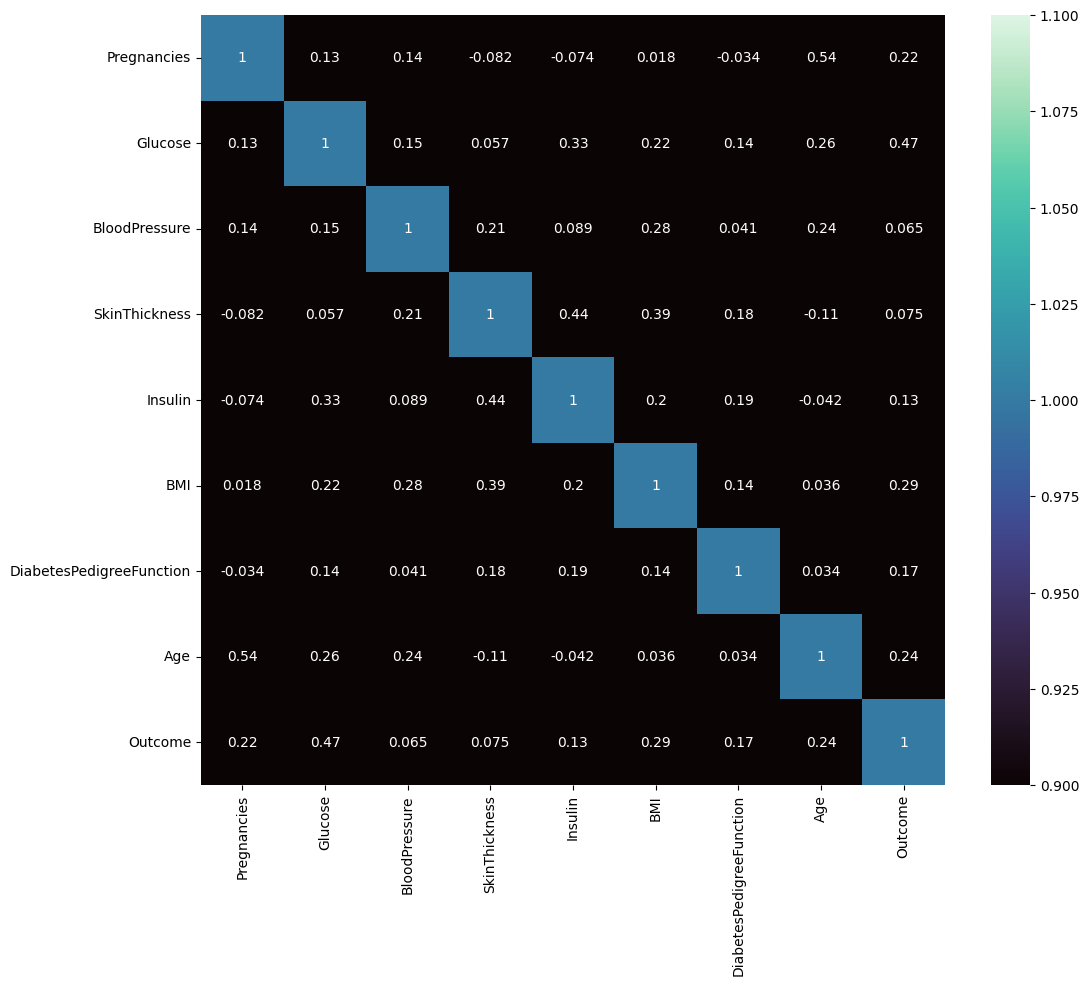

In [3]:
#Exploratory data analysis
correlation_matrix=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,vmin=1.0,vmax=1.0,cmap='mako')
plt.show()

In [4]:
#scaling the dataset
scaler=StandardScaler()
x=df.iloc[:,:-1]
y=df['Outcome']

In [5]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [6]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


/tmp/ipykernel_19/813259419.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x[column],shade=True)
/tmp/ipykernel_19/813259419.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x[column],shade=True)
/tmp/ipykernel_19/813259419.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x[column],shade=True)
/tmp/ipykernel_19/813259419.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x[column],shade=True)
/tmp/ipykernel_19/813259419.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`;

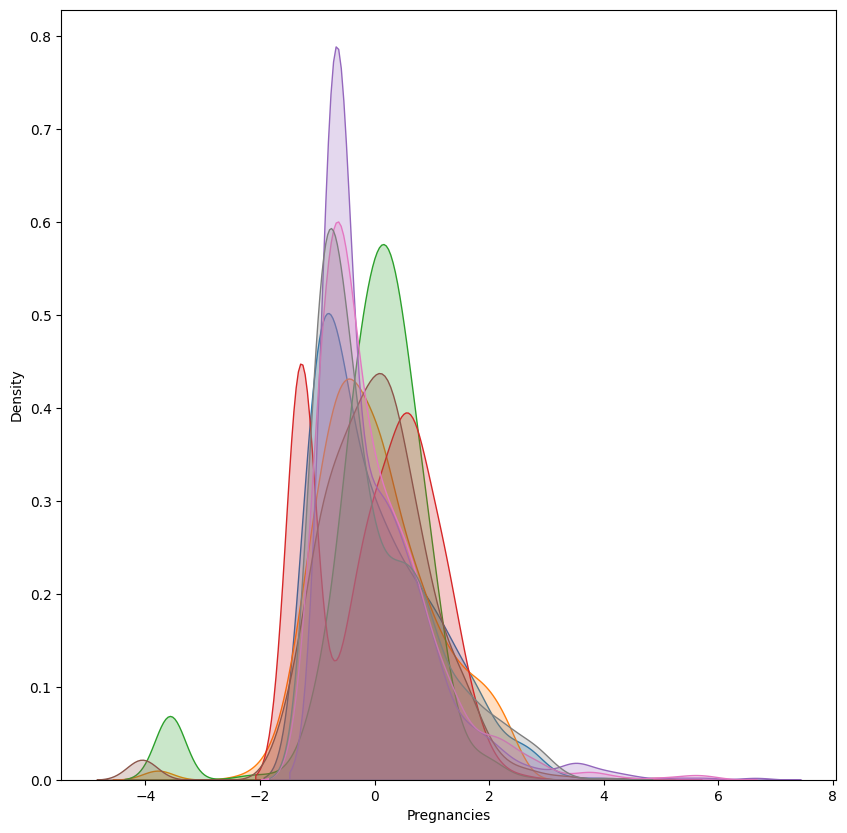

In [7]:
plt.figure(figsize=(10,10))
for column in x.columns:
    sns.kdeplot(x[column],shade=True)

In [8]:
#Splitting and Scaling the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [9]:
model=LogisticRegression()
model.fit(x_train,y_train)
print('The Model Score is',model.score(x_test,y_test))

The Model Score is 0.7489177489177489


In [10]:
svm_model=SVC(C=1.0)
svm_model.fit(x_train,y_train)
print("The Support Vector Machine Model's score is",svm_model.score(x_test,y_test))

The Support Vector Machine Model's score is 0.7489177489177489


In [11]:
ann_model=MLPClassifier(hidden_layer_sizes=(16,16))
ann_model.fit(x_train,y_train)
print('The Model accuracy',ann_model.score(x_test,y_test))

The Model accuracy 0.7186147186147186


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
